# Data Analysis on Pymaceuticals Research
----
## Conclusion


> Data analysis was performed on data set of 'Ketapril', 'Capomulin', 'Infubinol', 'Placebo' drugs (mouse_drug_data.csv, clinicaltrial_data.csv) and following observations were made:

----


### Trend 1:

![Survival](Images/survival.PNG)

Capomulin has definitely better survival rate in mice. Results of other drugs are very similar to placebo. 

----
### Trend 2:

![pctvolumechange](Images/pctvolumechange.PNG)

Negative Change in tumor volume further confirms effectiveness of Capomulin.
Other drugs are simply non effective as their results are similar to placebo.

----
### Trend 3:

![Metastatic](Images/Metastatic.PNG)

Number of Metastatic sites are increasing in treatments including Capomulin drug.
However there is significant standard error measurement in the mean value. This suggest that may be we should get more samples and verify the source of data.


----
## Tasks completed:

* Creating a scatter plot that shows how the tumor volume changes over time for each treatment.
* Creating a scatter plot that shows how the number of [metastatic](https://en.wikipedia.org/wiki/Metastasis) (cancer spreading) sites changes over time for each treatment.
* Creating a scatter plot that shows the number of mice still alive through the course of treatment (Survival Rate)
* Creating a bar graph that compares the total % tumor volume change for each drug across the full 45 days.

As final considerations:

* You must use the Pandas Library and the Jupyter Notebook.
* You must use the Matplotlib and Seaborn libraries.
* You must include a written description of three observable trends based on the data.
* You must use proper labeling of your plots, including aspects like: Plot Titles, Axes Labels, Legend Labels, X and Y Axis Limits, etc.
* Your scatter plots must include [error bars](https://en.wikipedia.org/wiki/Error_bar). This will allow the company to account for variability between mice. You may want to look into [`pandas.DataFrame.sem`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sem.html) for ideas on how to calculate this.
* Remember when making your plots to consider aesthetics!
  * Your legends should not be overlaid on top of any data.
  * Your bar graph should indicate tumor growth as red and tumor reduction as green.
    It should also include a label with the percentage change for each bar. You may want to consult this [tutorial](http://composition.al/blog/2015/11/29/a-better-way-to-add-labels-to-bar-charts-with-matplotlib/) for relevant code snippets.
* You must include an exported markdown version of your Notebook called  `README.md` in your GitHub repository.


---
## changelog
* 15-Feb-2018 


In [291]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [292]:
# Read CSV
Mouse= pd.read_csv('mouse_drug_data.csv', encoding = "ISO-8859-1")
Trial= pd.read_csv('clinicaltrial_data.csv', encoding = "ISO-8859-1")

In [293]:
#cleanup duplicates
Mouse=Mouse.drop_duplicates()
Trial=Trial.drop_duplicates()

In [294]:
Trial.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [295]:
Mouse.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [296]:
#Checking uniqueness
len(Trial)
#1892
len(Trial['Mouse ID'].unique())
#249

249

In [297]:
#Identifying bad data
len(Mouse['Mouse ID'].unique())
dup_series = Mouse['Mouse ID'].duplicated(keep='first')
Mouse[dup_series]

,Mouse ID,Drug
173,g989,Propriva


In [298]:
#Querying bad data
Mouse.loc[(Mouse['Mouse ID'] == 'g989')]

,Mouse ID,Drug
7,g989,Stelasyn
173,g989,Propriva


In [299]:
#Querying bad data from trial data frame
Trial.loc[(Trial['Mouse ID'] == 'g989')]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,0,45.000000,0
329,g989,5,48.786801,0
360,g989,5,47.570392,0
620,g989,10,51.745156,0
681,g989,10,49.880528,0
815,g989,15,51.325852,1
869,g989,15,53.442020,0
950,g989,20,55.326122,1
1111,g989,20,54.657650,1
1195,g989,25,56.045564,1


In [300]:
#Making sure there no other orphan trial records
x = pd.merge(Trial,Mouse,on = 'Mouse ID', how='left')
x = x.loc[(x['Drug'].isnull())]
x

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug


In [301]:
# Checking duplicate time in trial data frame
agg_dict_x = { 'Metastatic Sites': ['count' ]  }
df_group_type = Trial.groupby(['Mouse ID','Timepoint'])
t1 = df_group_type.agg(agg_dict_x)
t1.columns = ["_".join(x) for x in t1.columns.ravel()]

t1.loc[(t1['Metastatic Sites_count'] > 1)]

Metastatic Sites_count
Mouse ID Timepoint                        
g989     5                               2
         10                              2
         15                              2
         20                              2

In [302]:
# since Mouse ID = g989 has bad data ---cleaning up
Trial.set_index("Mouse ID" , inplace=True)
Trial.drop(['g989'], axis=0 , inplace=True)
Trial.reset_index(inplace=True)


Mouse.set_index("Mouse ID" , inplace=True)
Mouse.drop(['g989'], axis=0 , inplace=True)
Mouse.reset_index(inplace=True)

In [303]:
# Denormalized table

Test = pd.merge(Trial,Mouse,on = 'Mouse ID')

Test.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [304]:

# Filtering on needed data now 
# Drug = 'Capomulin', 'Infubinol', 'Ketapril', and 'Placebo'
Test = Test[(Test['Drug'] == 'Capomulin') | (Test['Drug'] ==  'Infubinol')| (Test['Drug'] ==  'Ketapril')| (Test['Drug'] == 'Placebo')]
Mouse = Mouse[(Mouse['Drug'] == 'Capomulin') | (Mouse['Drug'] ==  'Infubinol')| (Mouse['Drug'] ==  'Ketapril')| (Mouse['Drug'] == 'Placebo')]
#Mouse.head()
Test.loc[(Test['Mouse ID'] == 'b128')]


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin
5,b128,25,43.262145,1,Capomulin
6,b128,30,40.605335,1,Capomulin
7,b128,35,37.967644,1,Capomulin
8,b128,40,38.379726,2,Capomulin
9,b128,45,38.982878,2,Capomulin


In [305]:
Mouse['Drug'].unique()

array(['Ketapril', 'Capomulin', 'Infubinol', 'Placebo'], dtype=object)

In [306]:
#Setting up colors orders 

drug_array = Mouse['Drug'].unique()
drug_list = drug_array.tolist()
drug_list


color_dict_template = {
0 : '#13eac9' , #aqua
1 : '#dbb40c',#gold 
2 : '#75bbfd',#sky blue 
3 : '#fc5a50',#coral 
4 : '#7e1e9c',#purple
5 : '#15b01a',#green
6 : '#0343df',#blue
7 : '#ff81c0', #pink
8 : '#653700',#brown
9 : '#06c2ac', #turquoise
10 : '#c79fef',#lavender
11 : '#00035b',#dark blue
12 : '#d1b26f',#tan
13 : '#00ffff' #cyan
}

color_dict = dict(map(reversed, color_dict_template.items()))

for x, y in color_dict.items():
    if y < len(drug_list):
        color_dict[x] =  drug_list[y]

        
    
color_dict = dict(map(reversed, color_dict.items()))

color_dict['Ketapril']


'#13eac9'

In [307]:
#Setting up marker orders 

drug_array = Mouse['Drug'].unique()
drug_list = drug_array.tolist()
drug_list


marker_dict_template = {
15 : "." , #point
12 : "," , #pixel
2 : "o" , #circle
0 : "v" , #triangle_down
4 : "^" , #triangle_up
5 : "<" , #triangle_left
6 : ">" , #triangle_right
7 : "1" , #tri_down
8 : "2" , #tri_up
9 : "3" , #tri_left
10 :"4" , #tri_right
11 :"8" , #octagon
1 :"s" , #square
13 :"p" , #pentagon
14 :"P" , #plus (filled)
3 :"*" , #star
16 :"h" , #hexagon1
17 :"H" , #hexagon2
18 :"+"  #plus
}

marker_dict = dict(map(reversed, marker_dict_template.items()))

for x, y in marker_dict.items():
    if y < len(drug_list):
        marker_dict[x] =  drug_list[y]

        
    
marker_dict = dict(map(reversed, marker_dict.items()))

marker_dict['Capomulin']

's'

In [308]:
#Aggregation and standard error calculation 

agg_dict_x = { 'Tumor Volume (mm3)': ['mean' ,'sem'] , 'Metastatic Sites': ['mean' ,'sem'] , 'Mouse ID': ['nunique']  }
df_group_type = Test.groupby(['Drug' , 'Timepoint'])
Test2 = df_group_type.agg(agg_dict_x)
Test2.columns = ["_".join(x) for x in Test2.columns.ravel()]
Test2.reset_index(inplace=True)
Test2['zero_sem'] = round (Test2['Mouse ID_nunique'] * 0,0)
Test2.head(20)


,Drug,Timepoint,Tumor Volume (mm3)_mean,Tumor Volume (mm3)_sem,Metastatic Sites_mean,Metastatic Sites_sem,Mouse ID_nunique,zero_sem
0,Capomulin,0,45.000000,0.000000,0.000000,0.000000,25,0
1,Capomulin,5,44.266086,0.448593,0.160000,0.074833,25,0
2,Capomulin,10,43.084291,0.702684,0.320000,0.125433,25,0
3,Capomulin,15,42.064317,0.838617,0.375000,0.132048,24,0
4,Capomulin,20,40.716325,0.909731,0.652174,0.161621,23,0
5,Capomulin,25,39.939528,0.881642,0.818182,0.181818,22,0
6,Capomulin,30,38.769339,0.934460,1.090909,0.172944,22,0
7,Capomulin,35,37.816839,1.052241,1.181818,0.169496,22,0
8,Capomulin,40,36.958001,1.223608,1.380952,0.175610,21,0
9,Capomulin,45,36.236114,1.223977,1.476190,0.202591,21,0


In [309]:
#Find surviving Mouse pct

agg_dict_x = { 'Mouse ID': ['count' ]  }
df_group_type = Mouse.groupby(['Drug'])
Mouse_by_drug = df_group_type.agg(agg_dict_x)
Mouse_by_drug.columns = ["_".join(x) for x in Mouse_by_drug.columns.ravel()]
Mouse_by_drug.reset_index(inplace=True)

Mouse_by_drug.head()
    
    
Test2 =pd.merge(Test2, Mouse_by_drug, on='Drug')
 
Test2['Alive_pct'] = round (    (Test2['Mouse ID_nunique'] * 100)/ Test2['Mouse ID_count']   ,0 )

Test2.head()  

,Drug,Timepoint,Tumor Volume (mm3)_mean,Tumor Volume (mm3)_sem,Metastatic Sites_mean,Metastatic Sites_sem,Mouse ID_nunique,zero_sem,Mouse ID_count,Alive_pct
0,Capomulin,0,45.000000,0.000000,0.000000,0.000000,25,0,25,100.0
1,Capomulin,5,44.266086,0.448593,0.160000,0.074833,25,0,25,100.0
2,Capomulin,10,43.084291,0.702684,0.320000,0.125433,25,0,25,100.0
3,Capomulin,15,42.064317,0.838617,0.375000,0.132048,24,0,25,96.0
4,Capomulin,20,40.716325,0.909731,0.652174,0.161621,23,0,25,92.0


In [310]:
#creating graph function for reusability 

def my_line_graph(v_title,v_x_label,v_y_label,v_x_axis_series,v_y_axis_series,v_sem_series ):
    fig, ax1 = plt.subplots(figsize=(10, 6))

    for my_graph_category in Test2['Drug'].unique():
        df_scatter = Test2.loc[( Test2['Drug'] == my_graph_category) ,:]
        v_legend_title =''
        v_fig_note = ''
        x1, = df_scatter.plot(kind="line"
                              , x=v_x_axis_series
                              , y=v_y_axis_series
                              ,yerr = v_sem_series
                              , label = my_graph_category
                              , color = color_dict[my_graph_category]
                              , marker=marker_dict[my_graph_category]
                              , linestyle= '--'
                              , grid=True
                              ,subplots=True
                              , legend = True 
                              , title = v_title
                              , ax=ax1 
                               )

    lgnd = plt.legend(title =v_legend_title 
                      , fontsize="small"
                      , fancybox=False
                      ,loc="best"
                      ,facecolor  = 'inherit'
                      , framealpha=1
                      ,edgecolor  = 'inherit'
                      ,numpoints =2
               )  



    ax1.set_xlabel(v_x_label)
    ax1.set_ylabel(v_y_label)
    ax1.set_axisbelow(True)
    ax1.grid(linestyle=':')
    plt.figtext(.95, 0.60, v_fig_note, verticalalignment='center',horizontalalignment='left')
    plt.show()

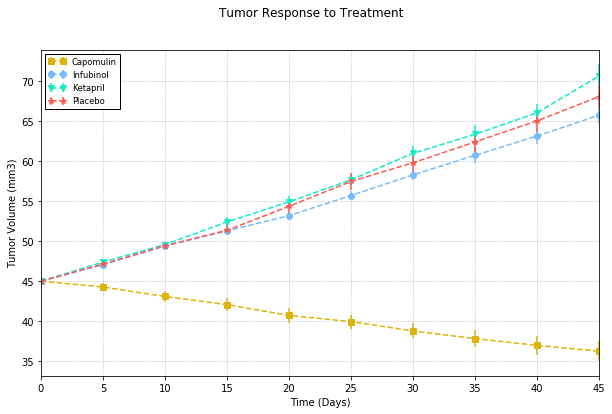

In [311]:
#creating plot for Tumor Response to Treatment

v_title ="Tumor Response to Treatment"
v_x_label ="Time (Days)"
v_y_label ="Tumor Volume (mm3)"

v_x_axis_series ="Timepoint"
v_y_axis_series  ="Tumor Volume (mm3)_mean"
v_sem_series  = "Tumor Volume (mm3)_sem"


my_line_graph(v_title,v_x_label,v_y_label,v_x_axis_series,v_y_axis_series,v_sem_series )



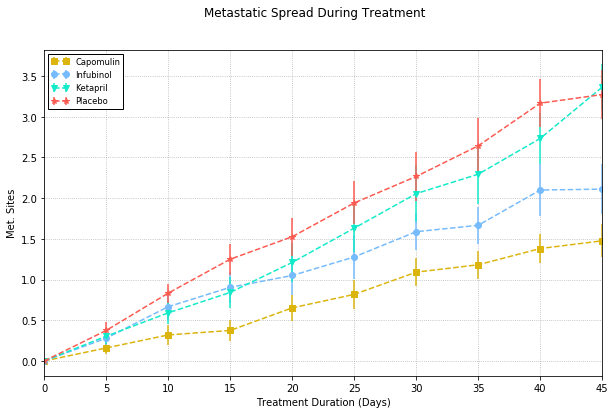

In [312]:
#creating plot Metastatic Spread During Treatment
v_title ="Metastatic Spread During Treatment"
v_x_label ="Treatment Duration (Days)"
v_y_label ="Met. Sites"

v_x_axis_series ="Timepoint"
v_y_axis_series  ="Metastatic Sites_mean"
v_sem_series  = "Metastatic Sites_sem"



my_line_graph(v_title,v_x_label,v_y_label,v_x_axis_series,v_y_axis_series,v_sem_series )


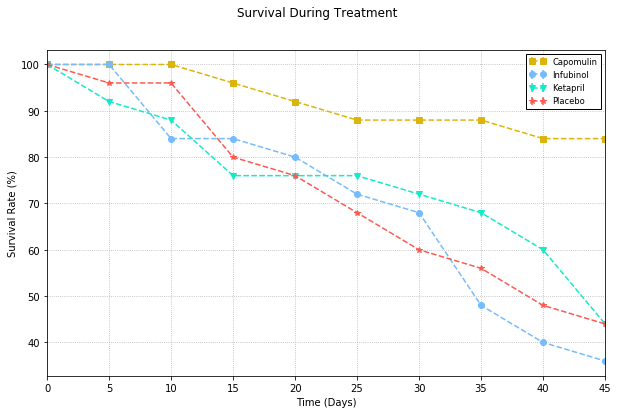

In [313]:
#creating plot for Survival During Treatment

v_title ="Survival During Treatment"
v_x_label ="Time (Days)"
v_y_label ="Survival Rate (%)"

v_x_axis_series ="Timepoint"
v_y_axis_series  ="Alive_pct"
v_sem_series  = "zero_sem"

my_line_graph(v_title,v_x_label,v_y_label,v_x_axis_series,v_y_axis_series,v_sem_series )

In [314]:
Test2.head()

,Drug,Timepoint,Tumor Volume (mm3)_mean,Tumor Volume (mm3)_sem,Metastatic Sites_mean,Metastatic Sites_sem,Mouse ID_nunique,zero_sem,Mouse ID_count,Alive_pct
0,Capomulin,0,45.000000,0.000000,0.000000,0.000000,25,0,25,100.0
1,Capomulin,5,44.266086,0.448593,0.160000,0.074833,25,0,25,100.0
2,Capomulin,10,43.084291,0.702684,0.320000,0.125433,25,0,25,100.0
3,Capomulin,15,42.064317,0.838617,0.375000,0.132048,24,0,25,96.0
4,Capomulin,20,40.716325,0.909731,0.652174,0.161621,23,0,25,92.0


In [315]:
#Calculation of pct volume change from day 0 and day 45 on mean volume of all the tests results
where_tuple_day0 = (Test2['Timepoint'] == 0)
where_tuple_day45 = (Test2['Timepoint'] == 45)

df_day0= Test2.loc[where_tuple_day0,['Drug','Tumor Volume (mm3)_mean']] 
df_day45= Test2.loc[where_tuple_day45,['Drug','Tumor Volume (mm3)_mean']] 


df_volume_change_pct = pd.merge(df_day0,df_day45,on = 'Drug', how = 'left', suffixes = ("_0","_45") )

df_volume_change_pct ['pct_tumor_volume_change'] = round(100*(df_volume_change_pct ['Tumor Volume (mm3)_mean_45'] - df_volume_change_pct ['Tumor Volume (mm3)_mean_0'])/ df_volume_change_pct ['Tumor Volume (mm3)_mean_0'],0)  



df_volume_change_pct

#df_volume_change_pct['Drug']

,Drug,Tumor Volume (mm3)_mean_0,Tumor Volume (mm3)_mean_45,pct_tumor_volume_change
0,Capomulin,45.0,36.236114,-19.0
1,Infubinol,45.0,65.755562,46.0
2,Ketapril,45.0,70.662958,57.0
3,Placebo,45.0,68.084082,51.0


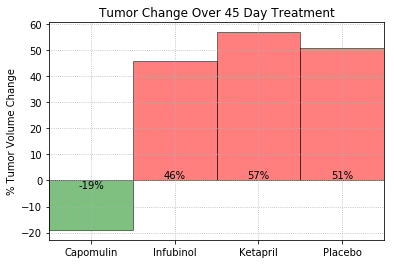

In [316]:
# ploting Tumor Change Over 45 Day Treatment
v_x_axis_series = df_volume_change_pct['Drug']
v_y_axis_series =  df_volume_change_pct['pct_tumor_volume_change'] 
v_title = 'Tumor Change Over 45 Day Treatment'
v_y_label = '% Tumor Volume Change'
colors = ['green' if x < 0 else 'red' for x in df_volume_change_pct['pct_tumor_volume_change']]
plt.bar(v_x_axis_series
        , v_y_axis_series
        ,1
        , color=colors
        ,edgecolor ='Black'
        , alpha=0.5
        , align="center"
       )

plt.grid(linestyle=':')
plt.ylabel(v_y_label)
plt.title(v_title)
plt.xlim([-0.5,len(v_x_axis_series) - 0.5] )
 
cnt = 0
for x in v_y_axis_series:
    pct_text = "{0:.0f}%".format(x)
    if x < 0 :
        v_verticalalignment='top'
    else :
        v_verticalalignment='bottom'
   
    plt.text(cnt, 0,pct_text, horizontalalignment='center',   verticalalignment=v_verticalalignment)
    cnt += 1

plt.show()